# Lab 1

## Part I

Design and implement an application that generates a list of all communities, which include community
№1 members, by the community №1 identifier. The list should be ranked from the most popular community
to the least.
Working process:
1. Register in the social network VKontakte - vk.com
2. Create a stand-alone application https://vk.com/dev and get the application ID
3. Get a token for working with the VK API
4. Using any programming language, implement the function of displaying communities by popularity
among participants in the initial community No. 1 (the number of participants must be at least 2000)


In [1]:
import os
from modules.vkapi import VkApi
import pandas as pd
import seaborn as sns

from dotenv import load_dotenv

load_dotenv()

True

ИШИТР ТПУ - 73332691

In [2]:
members_with_subscriptions = (VkApi(os.getenv('VK_API_URL'), os.getenv('VK_ACCESS_TOKEN'))
       .get_members_with_subscriptions(73332691))
(len(members_with_subscriptions), members_with_subscriptions[0])

(3415,
 {'user_id': '27755',
  'response': {'response': {'count': 93,
    'items': [{'id': 70419166,
      'name': 'Сообщество Академгородка | Новосибирск',
      'screen_name': 'akadem54',
      'is_closed': 0,
      'type': 'page',
      'photo_50': 'https://sun139-2.userapi.com/s/v1/if1/mldZISguNb4iFM7uNp_OnXH1UCRSTynczQgWiOnKgT4yjRtGehPkmNp9HoHTbdhd5iTXwEyy.jpg?quality=96&crop=9,9,281,281&as=32x32,48x48,72x72,108x108,160x160,240x240&ava=1&cs=50x50',
      'photo_100': 'https://sun139-2.userapi.com/s/v1/if1/mldZISguNb4iFM7uNp_OnXH1UCRSTynczQgWiOnKgT4yjRtGehPkmNp9HoHTbdhd5iTXwEyy.jpg?quality=96&crop=9,9,281,281&as=32x32,48x48,72x72,108x108,160x160,240x240&ava=1&cs=100x100',
      'photo_200': 'https://sun139-2.userapi.com/s/v1/if1/mldZISguNb4iFM7uNp_OnXH1UCRSTynczQgWiOnKgT4yjRtGehPkmNp9HoHTbdhd5iTXwEyy.jpg?quality=96&crop=9,9,281,281&as=32x32,48x48,72x72,108x108,160x160,240x240&ava=1&cs=200x200'},
     {'id': 63109975,
      'name': 'Наш БАДМИНТОН',
      'screen_name': 'koposovaleks

In [3]:
import itertools

def map_subscriptions_to_id_name(subscription_item: (str, dict[str, str | int])):
    return {
        'user_id': subscription_item['user_id'],
        'id': subscription_item['id'], 
        'name': subscription_item.get('name'),
        'is_closed': subscription_item['is_closed'],
        'type': subscription_item['type'],
    }    

def add_user_id_to_items(user_id, items):
    def add_user_id(item):
        item['user_id'] = user_id
        return item
    return list(map(lambda x: add_user_id(x), items))

subscriptions = map(lambda x: add_user_id_to_items(x.get('user_id'), x.get('response').get('response').get('items')), filter(lambda x: x.get('response') is None or x.get('response').get('response'), members_with_subscriptions))
subscriptions = list(itertools.chain.from_iterable(subscriptions))
subscriptions = list(map(lambda x: map_subscriptions_to_id_name(x), subscriptions))

df = pd.DataFrame.from_dict(subscriptions)

In [4]:
df

,user_id,id,name,is_closed,type
0,27755,70419166,Сообщество Академгородка | Новосибирск,0,page
1,27755,63109975,Наш БАДМИНТОН,0,page
2,27755,212097236,Интернет-магазин «Товары для бадминтона»,0,page
3,27755,213729350,Миша Киселёв. Без Барьеров,0,page
4,27755,175231820,Мемный край,0,page
...,...,...,...,...,...
48087,868135195,751819357,None,False,profile
48088,868135195,674408425,None,False,profile
48089,874569846,201345296,Поиск команды | Mobile Legends,0,page
48090,874593288,196716535,Сейчас в Томске,0,page


C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [5]:
df['name'].value_counts().sort_values(ascending=False).head(3)

name
Подслушано в ТПУ           978
Регион-70 | Томск          477
AVTFamily | Актив ИШИТР    375
Name: count, dtype: int64

C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


## Part II

Design and implement the function of a VK community “demographic portrait” forming. As an input 
parameter, the function should accept the identifier of the VK group. The output should contain:
1. The number of community members.
2. The average age of community members. Median age of community members. Percentage of users 
with no information about age.
3. Gender of community members: percentage of men, women, participants who did not indicate 
gender.
4. Place of residence - country, city. Percentage of users who did not indicate their place of residence.
The result should be displayed in tables and graphs.

In [3]:
members = (VkApi(os.getenv('VK_API_URL'), os.getenv('VK_ACCESS_TOKEN'))
                              .get_members(73332691, ['bdate', 'sex', 'country', 'city']))
(len(members), members[0])

(3416,
 {'id': 27755,
  'bdate': '9.6.1983',
  'city': {'id': 99, 'title': 'Novosibirsk'},
  'sex': 2,
  'first_name': 'Evgeny',
  'last_name': 'Khokhlunov',
  'can_access_closed': True,
  'is_closed': False})

ИШИТР ТПУ - 73332691

In [4]:
df = pd.DataFrame(members)
df

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,deactivated
0,27755,9.6.1983,"{'id': 99, 'title': 'Novosibirsk'}",2,Evgeny,Khokhlunov,True,False,NaN
1,60775,23.12,NaN,2,Alexander,Rechitsky,False,True,NaN
2,174651,8.7,NaN,1,Ksenia,Sova,False,True,NaN
3,715407,8.5,"{'id': 2, 'title': 'Saint Petersburg'}",2,Ivan,Tretyakov,True,False,NaN
4,797740,27.4,"{'id': 1, 'title': 'Moscow'}",1,Polina,Mozgaleva,True,False,NaN
...,...,...,...,...,...,...,...,...,...
3411,872948306,26.9.2006,NaN,1,Liza,Nesterova,False,True,NaN
3412,874403445,NaN,NaN,1,Inga,Kireeva,False,True,NaN
3413,874569846,21.1.2005,NaN,2,Dolgion,Lkhagvatseren,True,False,NaN
3414,874593288,4.6.2004,NaN,1,Olga,Ii,True,False,NaN


C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [11]:
from datetime import datetime


def age(dob: datetime):
    today = datetime.today()
    this_year_birthday = datetime(today.year, dob.month, dob.day)
    if this_year_birthday < today:
        years = today.year - dob.year
    else:
        years = today.year - dob.year - 1
    return years

def get_age(x: str):
    if not x:
        return None
    if isinstance(x, float):
        return None
    t_members = x.split('.')
    if len(t_members) == 3:
        return age(datetime.strptime(x, '%d.%m.%Y'))
    return None

df['age'] = df['bdate'].map(get_age)
df

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,deactivated,age
0,27755,9.6.1983,"{'id': 99, 'title': 'Novosibirsk'}",2,Evgeny,Khokhlunov,True,False,NaN,41.0
1,60775,23.12,NaN,2,Alexander,Rechitsky,False,True,NaN,NaN
2,174651,8.7,NaN,1,Ksenia,Sova,False,True,NaN,NaN
3,715407,8.5,"{'id': 2, 'title': 'Saint Petersburg'}",2,Ivan,Tretyakov,True,False,NaN,NaN
4,797740,27.4,"{'id': 1, 'title': 'Moscow'}",1,Polina,Mozgaleva,True,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3411,872948306,26.9.2006,NaN,1,Liza,Nesterova,False,True,NaN,18.0
3412,874403445,NaN,NaN,1,Inga,Kireeva,False,True,NaN,NaN
3413,874569846,21.1.2005,NaN,2,Dolgion,Lkhagvatseren,True,False,NaN,19.0
3414,874593288,4.6.2004,NaN,1,Olga,Ii,True,False,NaN,20.0


C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [68]:
df.isna().sum()

id               0
first_name       0
last_name        0
age           1986
sex              1
city          1190
dtype: int64

In [18]:
def convert_sex(x):
    if x == 2:
        return 'M'
    if x == 1:
        return 'F'

df['sex'] = df['sex'].map(convert_sex)
df

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,deactivated,age
0,27755,9.6.1983,"{'id': 99, 'title': 'Novosibirsk'}",M,Evgeny,Khokhlunov,True,False,NaN,41.0
1,60775,23.12,NaN,M,Alexander,Rechitsky,False,True,NaN,NaN
2,174651,8.7,NaN,F,Ksenia,Sova,False,True,NaN,NaN
3,715407,8.5,"{'id': 2, 'title': 'Saint Petersburg'}",M,Ivan,Tretyakov,True,False,NaN,NaN
4,797740,27.4,"{'id': 1, 'title': 'Moscow'}",F,Polina,Mozgaleva,True,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3411,872948306,26.9.2006,NaN,F,Liza,Nesterova,False,True,NaN,18.0
3412,874403445,NaN,NaN,F,Inga,Kireeva,False,True,NaN,NaN
3413,874569846,21.1.2005,NaN,M,Dolgion,Lkhagvatseren,True,False,NaN,19.0
3414,874593288,4.6.2004,NaN,F,Olga,Ii,True,False,NaN,20.0


C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [27]:
df[~df['city'].isna()]

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,deactivated,age
0,27755,9.6.1983,"{'id': 99, 'title': 'Novosibirsk'}",M,Evgeny,Khokhlunov,True,False,NaN,41.0
3,715407,8.5,"{'id': 2, 'title': 'Saint Petersburg'}",M,Ivan,Tretyakov,True,False,NaN,NaN
4,797740,27.4,"{'id': 1, 'title': 'Moscow'}",F,Polina,Mozgaleva,True,False,NaN,NaN
5,851799,1.9,"{'id': 144, 'title': 'Tomsk'}",F,Tatyana,Glazyrina,True,False,NaN,NaN
8,1227194,14.1.1992,"{'id': 1, 'title': 'Moscow'}",F,Ksyunkhen,Staroseltseva,True,False,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...
3397,830602124,NaN,"{'id': 144, 'title': 'Tomsk'}",M,Konstantin,Bobrovsky,False,True,NaN,NaN
3399,834584642,9.12.1988,"{'id': 994, 'title': 'Belovo'}",M,Arseny,Ivanov,True,False,NaN,35.0
3405,850735284,18.2.1979,"{'id': 882, 'title': 'Achinsk'}",M,Dmitry,Pinyasov,True,False,NaN,45.0
3406,856095890,17.11.1992,"{'id': 144, 'title': 'Tomsk'}",M,Marco,Khalil,True,False,NaN,31.0


C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [37]:
def convert_city(x):
    if x is None:
        return None
    if isinstance(x, dict):
        return x['title']

df['city'] = df['city'].map(convert_city)
df

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,deactivated,age
0,27755,9.6.1983,Novosibirsk,M,Evgeny,Khokhlunov,True,False,NaN,41.0
1,60775,23.12,None,M,Alexander,Rechitsky,False,True,NaN,NaN
2,174651,8.7,None,F,Ksenia,Sova,False,True,NaN,NaN
3,715407,8.5,Saint Petersburg,M,Ivan,Tretyakov,True,False,NaN,NaN
4,797740,27.4,Moscow,F,Polina,Mozgaleva,True,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3411,872948306,26.9.2006,None,F,Liza,Nesterova,False,True,NaN,18.0
3412,874403445,NaN,None,F,Inga,Kireeva,False,True,NaN,NaN
3413,874569846,21.1.2005,None,M,Dolgion,Lkhagvatseren,True,False,NaN,19.0
3414,874593288,4.6.2004,None,F,Olga,Ii,True,False,NaN,20.0


C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [40]:
df = df[['id', 'first_name', 'last_name', 'age', 'sex', 'city']]
df

,id,first_name,last_name,age,sex,city
0,27755,Evgeny,Khokhlunov,41.0,M,Novosibirsk
1,60775,Alexander,Rechitsky,NaN,M,None
2,174651,Ksenia,Sova,NaN,F,None
3,715407,Ivan,Tretyakov,NaN,M,Saint Petersburg
4,797740,Polina,Mozgaleva,NaN,F,Moscow
...,...,...,...,...,...,...
3411,872948306,Liza,Nesterova,18.0,F,None
3412,874403445,Inga,Kireeva,NaN,F,None
3413,874569846,Dolgion,Lkhagvatseren,19.0,M,None
3414,874593288,Olga,Ii,20.0,F,None


C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


<Axes: xlabel='age', ylabel='Count'>

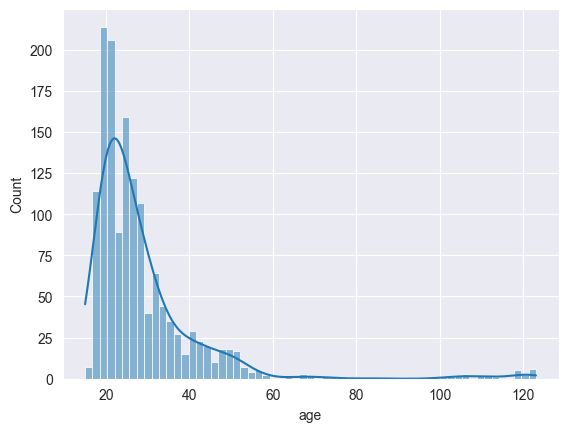

C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [43]:
sns.histplot(df, x='age', kde=True)

### Average age

In [44]:
df['age'].sum() / df['age'].count()

28.744755244755243

### Median age

In [47]:
df['age'].mode()

0    20.0
Name: age, dtype: float64

In [48]:
df['age'].value_counts()

age
20.0     136
24.0     115
21.0     107
18.0     101
22.0      99
        ... 
101.0      1
110.0      1
74.0       1
55.0       1
109.0      1
Name: count, Length: 63, dtype: int64

### Percentage of users with no information about age

In [62]:
df[df['age'].isna()].shape[0]

1986

In [64]:
df[df['age'].isna()].shape[0] * 100 / df.shape[0]

58.13817330210773

### Percentage of men, women, participants who did not indicate gender

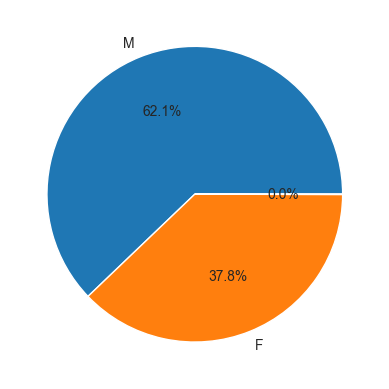

C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [78]:
import matplotlib.pyplot as plt

sex_counts = df['sex'].value_counts(dropna=False)
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')
plt.show()

### Place of City. Percentage of users who did not indicate their place of residence.

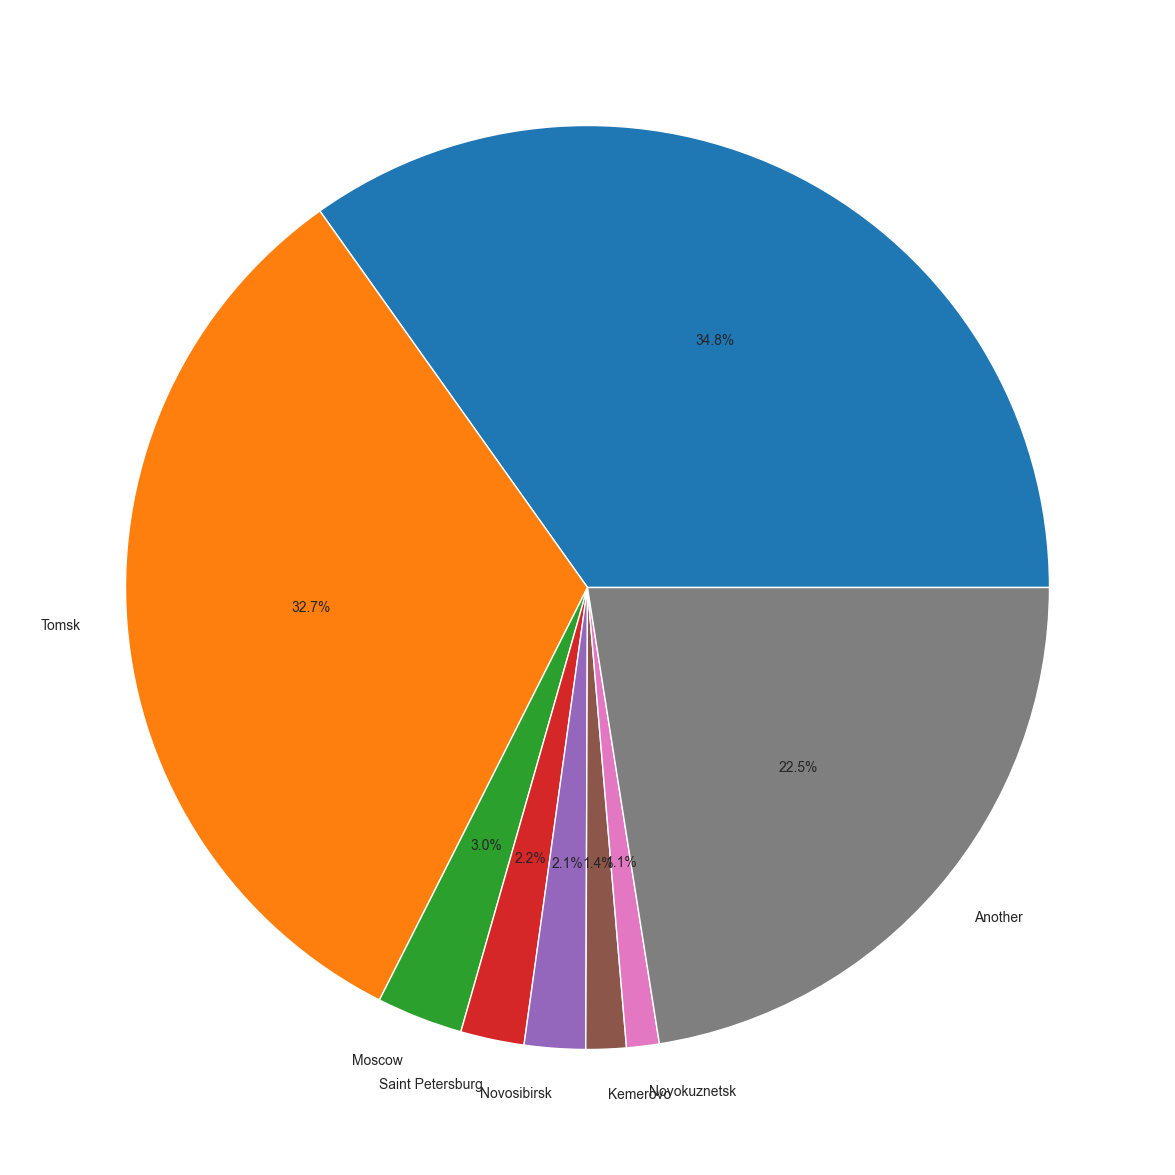

C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [93]:
city_counts = df['city'].value_counts(dropna=False)
city_rounded = city_counts[city_counts > 30]
city_rounded._set_value('Another', city_counts[city_counts <= 30].sum())
plt.figure(figsize=(15, 15))
plt.pie(city_rounded.values, labels=city_rounded.index, autopct='%1.1f%%')
plt.show()

## Part III

Develop and implement the following functions:
1. Social graph of VK community members’ visualization (numbering more than 1,000 users).
2. Identification of the most important node (the user) by degree centrality, closeness centrality, 
betweenness centrality, and eigenvector centrality.

The result should be presented as a section of the report containing a listing of program code and 
screenshots.